In [1]:
# Imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, median_absolute_error

from time import time


In [2]:
"""
SVM
Source: Week 10 Notebook

from sklearn.linear_model import LinearRegression
"""

from scipy import stats
import pylab as pl
import seaborn as sns; 

from sklearn.svm import SVR, LinearSVR

sns.set()

In [3]:
# Load train data
train_labels = pd.read_csv('../Data/final/train_labels_processed.csv', sep=',', engine='python')
train_data = pd.read_csv('../Data/final/train_data_processed.csv', sep=',', engine='python')
print('Train data done')

# Load test data
test_labels = pd.read_csv('../Data/final/test_labels_processed.csv', sep=',', engine='python')
test_data = pd.read_csv('../Data/final/test_data_processed.csv', sep=',', engine='python')
print('Test data done')

Train data done
Test data done


In [4]:
# Split into test and validation data
validation_data, validation_labels = train_data[:30000], train_labels[:30000]
train_data, train_labels = np.asarray(train_data[30000:]), np.asarray(train_labels[30000:])
mini_train_data, mini_train_labels = train_data[:1000], train_labels[:1000]
test_data, test_labels = np.asarray(test_data), np.asarray(test_labels)

In [5]:
# Fit models with three different kernels
t0 = time() # Check the runtime
svr = SVR()
svr.fit(train_data, np.ravel(train_labels))

print('Runtime: ', time()-t0)

NameError: name 'rbf' is not defined

In [6]:
# Predict the output
t0 = time()
predicted = svr.predict(test_data)
print('Runtime: ', time()-t0)

Runtime:  36.29479742050171


In [7]:
print(predicted)
print(predicted.shape)

[ 0.00713066  0.05100679  0.01401246 ... -0.0093292   0.04160304
  0.04113883]
(37854,)


In [8]:
print('rbf')
print("Mean squared error:    %.4f" %mean_squared_error(test_labels, predicted))
print("Mean absolute error:   %.4f" %mean_absolute_error(test_labels, predicted))
print("Median absolute error: %.4f" %median_absolute_error(test_labels, predicted))

rbf
Mean squared error:    0.0266
Mean absolute error:   0.0737
Median absolute error: 0.0401


Mean Squared Error:  0.02660615191193847
Variance Score:  -0.009067689966315573


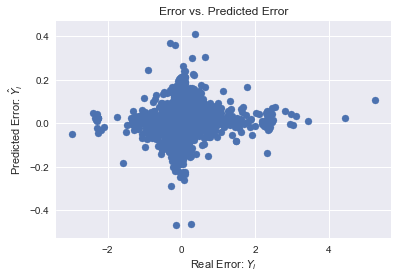

In [12]:
# 6. Test the accuracy of the classifier
# Start by plotting the train labels against the predicted data 
fig, ax = plt.subplots(1,1)
ax.scatter(np.ravel(test_labels), predicted)
#ax.set_xlim(-.5, .5)
ax.set_xlabel("Real Error: $Y_i$")
ax.set_ylabel("Predicted Error: $\hat{Y}_i$")
ax.set_title("Error vs. Predicted Error")

# Calculate the mean square error
mse = np.mean((predicted-np.ravel(test_labels))**2)
print('Mean Squared Error: ', mse)

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
var_score = svr.score(test_data, test_labels)
print('Variance Score: ', var_score)